<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/Caltech-JPL-Intern/HRDiagramGen/Wikipedia/HRDiagramGen_WikiExoplanetaryHostStars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# Jupyter Notebook script (Python) to generate Hertzsprung-Russell diagram for the stellar hosts from the
# wikipedia: https://en.wikipedia.org/wiki/List_of_multiplanetary_systems

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

In [86]:
pd.options.mode.copy_on_write = True

In [87]:
spectral_class_color = {
    'O': 'blue',
    'B': 'deepskyblue',
    'A': 'white',
    'F': 'lightyellow',
    'G': 'yellow',
    'K': 'orange',
    'M': 'red'
}

spectral_class_label = {
    'O': 'Spectral Class: O',
    'B': 'Spectral Class: B',
    'A': 'Spectral Class: A',
    'F': 'Spectral Class: F',
    'G': 'Spectral Class: G',
    'K': 'Spectral Class: K',
    'M': 'Spectral Class: M'
}

def plot_selected_stars(ax, stellar_data, x_field, y_field, is_selected, is_x_as_int, color, edgecolors, label):
    if is_x_as_int:
        x = stellar_data[x_field][is_selected].astype(int)
    else:
        x = stellar_data[x_field][is_selected]
    y = stellar_data[y_field][is_selected]
    ax.scatter(x=x,
               y=y,
               c=color,
               edgecolors=edgecolors,
               label=label)

def plot_stars(ax, stellar_data, x_field, y_field, spectral_field, is_x_as_int, edgecolors):
    for spectral_class in spectral_class_label:
        plot_selected_stars(ax=ax,
                            stellar_data=stellar_data,
                            x_field=x_field,
                            y_field=y_field,
                            is_selected=stellar_data[spectral_field].map(lambda x: x[0].upper() == spectral_class),
                            is_x_as_int=is_x_as_int,
                            color=spectral_class_color[spectral_class],
                            label=spectral_class_label[spectral_class],
                            edgecolors=edgecolors)

def set_legend_size(legend, legend_count, legend_size):
    for i in range (legend_count):
        legend.legend_handles[i]._sizes = [legend_size]

In [88]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# Load the stellar hosts data from the csv file. Each stellar host is represented as a row entry in the csv file,
# with four data fields:
#     Star (Star Name),
#     Apparent (Apparent Magnitude),
#     Distance (Distance in light years),
#     Spectral (Spectral Type)
#
# To run the program, the stellar hosts data csv file needs to be at the same folder as the Jupyter Notebook file.
stellar_hosts_filename = '/content/drive/My Drive/Colab Notebooks/WikiExoplanetaryHostStars.csv'
stellar_hosts_data = pd.read_table(stellar_hosts_filename,
                                   skiprows=1,
                                   sep=',',
                                   header=None,
                                   index_col=None,
                                   names = ['Star', 'Apparent', 'Distance', 'Spectral'],
                                   skipfooter=0,
                                   engine='python')

In [92]:
# Sanity check the first several rows of data to ensure data is read correctly
stellar_hosts_data.head()

,Star,Apparent,Distance,Spectral
0,Sun,−26.74,0.000016,G2V
1,Proxima Centauri,10.43 to 11.11[4],4.244,M5.5Ve[5]
2,Lalande 21185,7.520[9],8.3044±0.0007,M2V
3,Lacaille 9352,7.34,10.721,M0.5V
4,Luyten's Star,9.872,11.2,M3.5V


In [93]:
# Sanity check the last several rows of data to ensure data is read correctly.
stellar_hosts_data.tail()

,Star,Apparent,Distance,Spectral
248,Kepler-332,NaN,NaN,NaN
249,Kepler-331,NaN,NaN,NaN
250,Kepler-327,NaN,NaN,NaN
251,Kepler-326,NaN,NaN,NaN
252,Kepler-325,NaN,NaN,NaN


In [94]:
# Get the statistics about the data
stellar_hosts_data.describe()

,Star,Apparent,Distance,Spectral
count,253,186,213,193
unique,253,169,209,91
top,Sun,15.5,126,K
freq,1,3,2,10


In [95]:
# Change any fields with empty spaces to NaN values so we could clean them up later on
stellar_hosts_data = stellar_hosts_data.applymap(
    lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
stellar_hosts_data.describe()

,Star,Apparent,Distance,Spectral
count,253,186,213,193
unique,253,169,209,91
top,Sun,15.5,126,K
freq,1,3,2,10


In [96]:
# Clean up data - drop off rows that contain NaN values
stellar_hosts_data = stellar_hosts_data.dropna()
stellar_hosts_data.describe()

,Star,Apparent,Distance,Spectral
count,170,170,170,170
unique,170,155,166,88
top,Sun,16,126,K0V
freq,1,3,2,8


In [97]:
# Clean up data - drop off duplicate rows from the data (keyed by hostname)
stellar_hosts_data = stellar_hosts_data.drop_duplicates(subset=['Star'])
stellar_hosts_data.describe()

,Star,Apparent,Distance,Spectral
count,170,170,170,170
unique,170,155,166,88
top,Sun,16,126,K0V
freq,1,3,2,8


In [98]:
# Output the cleaned up data into csv file for analysis if needed
stellar_hosts_output_filename = '/content/drive/My Drive/Colab Notebooks/WikiExoplanetaryHostStars_cleaned.csv'
stellar_hosts_data.to_csv(stellar_hosts_output_filename)

In [99]:
stellar_hosts_data['Apparent'] = pd.to_numeric(stellar_hosts_data['Apparent'], errors='coerce', downcast='float')
stellar_hosts_data['Distance'] = pd.to_numeric(stellar_hosts_data['Distance'], errors='coerce', downcast='float')
stellar_hosts_data.describe()
stellar_hosts_data.head()

,Star,Apparent,Distance,Spectral
0,Sun,NaN,0.000016,G2V
1,Proxima Centauri,NaN,4.244000,M5.5Ve[5]
2,Lalande 21185,NaN,NaN,M2V
3,Lacaille 9352,7.340,10.721000,M0.5V
4,Luyten's Star,9.872,11.200000,M3.5V


In [100]:
stellar_hosts_data = stellar_hosts_data.dropna()

In [101]:
stellar_hosts_data['Absolute'] = stellar_hosts_data['Apparent'] - 5 * np.log10(stellar_hosts_data['Distance']*0.306601/10.)

In [102]:
stellar_hosts_data.head()

,Star,Apparent,Distance,Spectral,Absolute
3,Lacaille 9352,7.340,10.721,M0.5V,9.755956
4,Luyten's Star,9.872,11.200,M3.5V,12.193042
5,YZ Ceti,12.070,11.740,M4.5V,14.288792
6,Gliese 1061,13.030,12.040,M5.5V,15.193999
7,Teegarden's Star,15.130,12.497,M7V,17.213104


In [103]:
stellar_hosts_data.describe()

,Apparent,Distance,Absolute
count,156.000000,156.000000,156.000000
mean,11.578628,1021.097351,6.517103
std,3.466794,1365.404907,3.112157
min,4.090000,10.721000,1.961982
25%,8.822000,87.000000,4.389678
50%,11.980000,347.000000,5.521197
75%,14.010000,1309.000000,7.645236
max,24.309999,5867.000000,18.384146


In [104]:
# Count the number of spectral classes
spectral_classes = stellar_hosts_data['Spectral'].map(lambda x: x[0].upper())
spectral_classes.value_counts()

Spectral
G    65
K    43
M    31
F    15
A     1
P     1
Name: count, dtype: int64

In [105]:
# Keep the stellar hosts with OBAFGKM spectral classes
stellar_hosts_data = stellar_hosts_data[stellar_hosts_data['Spectral'].map(lambda x: x[0].upper() in 'OBAFGKM')]

# Count the number of spectral classes
spectral_classes = stellar_hosts_data['Spectral'].map(lambda x: x[0].upper())
spectral_classes.value_counts()

Spectral
G    65
K    43
M    31
F    15
A     1
Name: count, dtype: int64

In [106]:
# Output the data for plot into csv file for analysis if needed
stellar_hosts_output_filename = '/content/drive/My Drive/Colab Notebooks/WikiExoplanetaryHostStars_plot.csv'
stellar_hosts_data.to_csv(stellar_hosts_output_filename)

In [107]:
# Rows that do not meet the condition alpha + num are eliminated
i  = stellar_hosts_data['Spectral'].apply(
    lambda x: (len(x) >= 2)  and (x[0].isalpha()) and (x[1].isdigit()))
stellar_hosts_data = stellar_hosts_data[i]

# A new column is created with the first two characters from 'SpType'
stellar_hosts_data['SpectralShort'] = stellar_hosts_data['Spectral'].apply(lambda x : x[0].upper() + x[1:2])

stellar_hosts_data.head()

,Star,Apparent,Distance,Spectral,Absolute,SpectralShort
3,Lacaille 9352,7.340,10.721,M0.5V,9.755956,M0
4,Luyten's Star,9.872,11.200,M3.5V,12.193042,M3
5,YZ Ceti,12.070,11.740,M4.5V,14.288792,M4
6,Gliese 1061,13.030,12.040,M5.5V,15.193999,M5
7,Teegarden's Star,15.130,12.497,M7V,17.213104,M7


In [108]:
stellar_hosts_data.describe()

,Apparent,Distance,Absolute
count,125.000000,125.000000,125.000000
mean,10.846488,737.569641,6.648499
std,3.233108,1207.286499,3.170207
min,4.090000,10.721000,2.937869
25%,8.310000,67.000000,4.407722
50%,11.200000,175.000000,5.593896
75%,13.030000,737.112976,7.935214
max,18.799999,5867.000000,18.384146


In [109]:
spec_code_map = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
stellar_hosts_data['SpectralShort'] = stellar_hosts_data['SpectralShort'].apply(
    lambda x: spec_code_map[x[0]]+x[1])
stellar_hosts_data.head()

,Star,Apparent,Distance,Spectral,Absolute,SpectralShort
3,Lacaille 9352,7.340,10.721,M0.5V,9.755956,60
4,Luyten's Star,9.872,11.200,M3.5V,12.193042,63
5,YZ Ceti,12.070,11.740,M4.5V,14.288792,64
6,Gliese 1061,13.030,12.040,M5.5V,15.193999,65
7,Teegarden's Star,15.130,12.497,M7V,17.213104,67


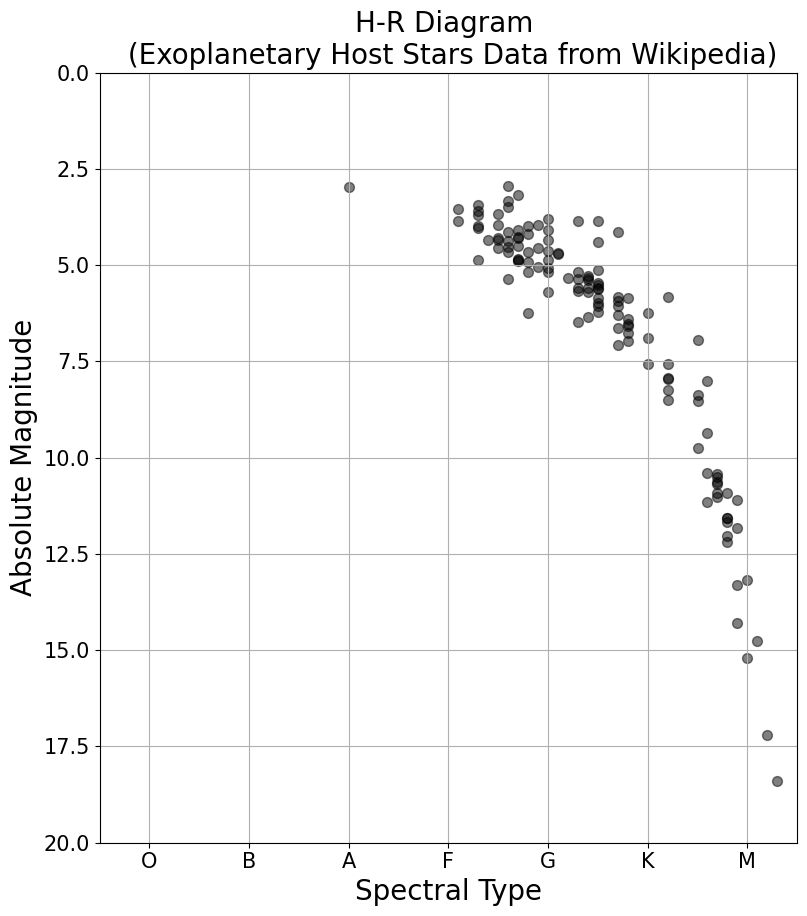

In [110]:
fig, ax = plt.subplots(figsize=(9,10))

ax.set_xlim(0, 70)
ax.set_ylim(20, 0)
ax.grid()
ax.set_title('H-R Diagram \n (Exoplanetary Host Stars Data from Wikipedia)')

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Type')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Absolute Magnitude')
ax.yaxis.label.set_fontsize(20)

ax.scatter(stellar_hosts_data['SpectralShort'].astype(int),
           stellar_hosts_data['Absolute'],
           s=50,
           edgecolors='black',
           alpha=0.5,
           c='black')

ax.set_xticks(range(5, 75, 10))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=15)

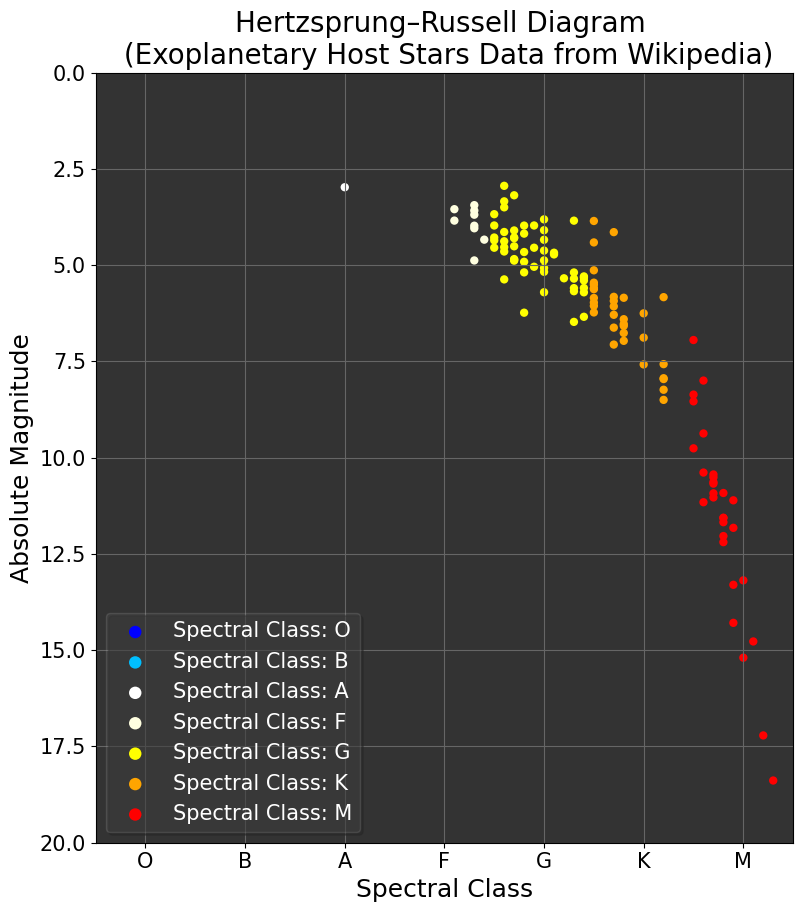

In [111]:
# Plot a H-R digram with Spectral Class as the x axis and Absolute Magnitude as the y axis

fig = plt.figure(figsize=(9,10))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(0, 70)
ax.set_ylim(20, 0)
ax.grid(color='0.4')
ax.set_title('Hertzsprung–Russell Diagram \n (Exoplanetary Host Stars Data from Wikipedia)')
ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Class')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Absolute Magnitude')
ax.yaxis.label.set_fontsize(18)

plot_stars(ax=ax,
           stellar_data=stellar_hosts_data,
           x_field='SpectralShort',
           y_field='Absolute',
           spectral_field='Spectral',
           is_x_as_int=True,
           edgecolors='none')

ax.set_xticks(range(5, 75, 10))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize = 15,
                   markerscale = 2,
                   shadow=True,
                   framealpha=0.15)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')